## CHURN ANALYSIS AND PREDICTION PROJECT

In [1]:
#importing the necessary libraries for th project
import numpy as np
import pandas as pd #For data preprocessing
import matplotlib.pyplot as plt#For data visualization
import seaborn as sns#For data visualization
import missingno as msno #For missing data visualization
from collections import Counter

In [2]:
#importing the dataset into the python environment
data = pd.read_csv('Customer-Churn.csv')

In [3]:
#Displayingthe first 5 rows of the data set
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#displaying the last 5 rows of the data set
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
#Checking the general info about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
#checking the shape of the data set
data.shape

(7043, 21)

In [7]:
#Displaying the features/columns in the data set  
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
# Numerical Statistical Analysis
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
#Categorical Stastistical analysis
data.describe(include =["object", "bool"]).T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [10]:
# "TotalCharges" feature which is expected to be a numerical type data but came as an object data type would...
# be converted to a float.
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors='coerce').astype(float)

In [11]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### The TotalCharges is now converted to a numeric (float) data type  but missing 11 entries, having 7032 instead of 7043 total emtries    

In [13]:
#dealing with missing data
Null_vals = data.isnull().sum()
Null_vals

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

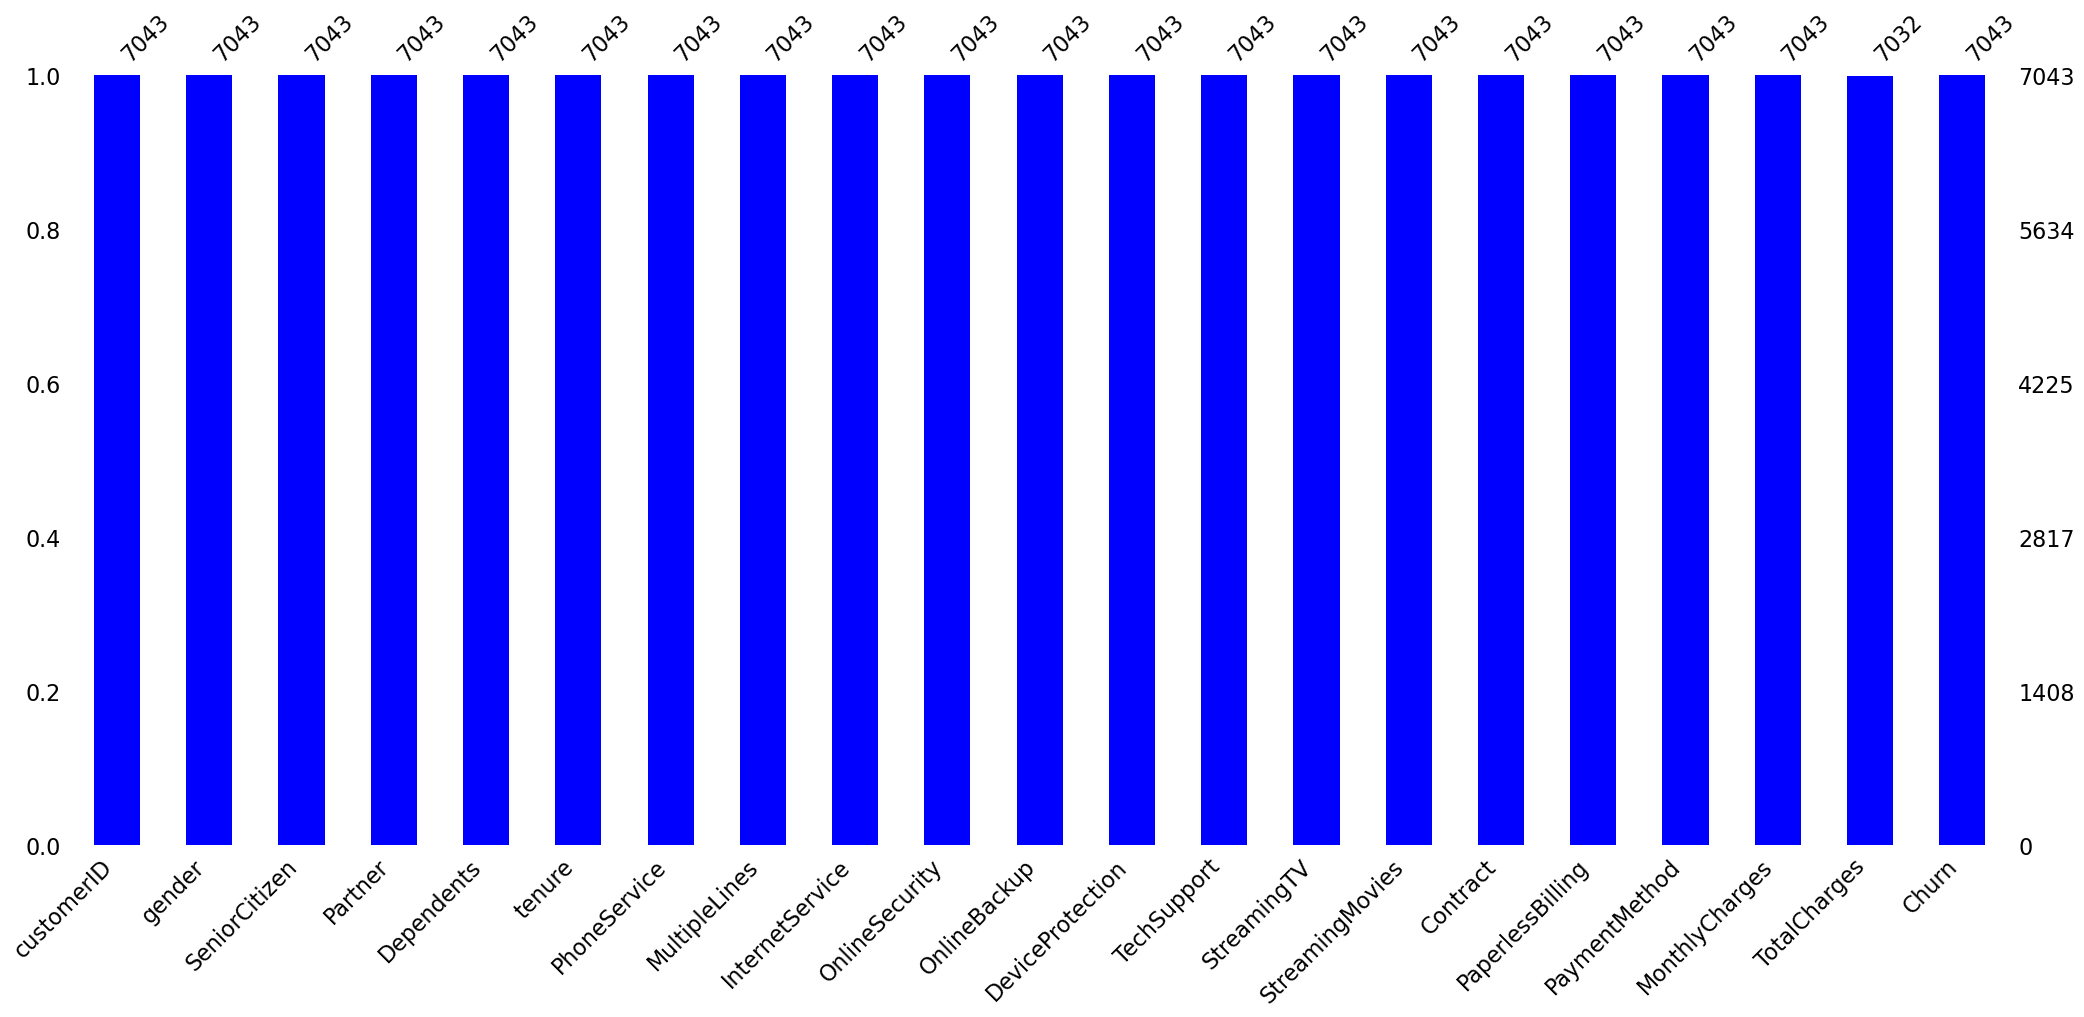

In [14]:
#visualizingthe missing data with bar plot
msno.bar(data, color = "Blue");

### From output [13] & [14] above, TotalCharges  column is 11 data lessthan the total 7043 entries

In [15]:
#priting the rows where there are missing data
print(data[data.isnull().any(axis=1)])

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ... 

### 11 rows out of 7043 will not significantly affect our dataset, hence, we are dropping the 11 rows where there are missing data 

In [16]:
# Dropping the rows with missing values
N_data = data.dropna()



### Comfirming if the missing data has been dropped

In [17]:
Null_vals = N_data.isnull().sum()
Null_vals

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### The 11 rows containing the missing data has been dropped 

In [18]:
#identifying duplicated data points
N_data.duplicated().sum()

0

In [19]:
N_data.shape

(7032, 21)

### We now have 7,032 rows as against the initial 7,043

In [20]:
# Check for duplicates based on all columns
duplicates = N_data[N_data.duplicated()].sum()
duplicates

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

### We don't have duplicates data in the dataset

### FEATURE ENGINEERING

In [21]:
N_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


### Having dropped the 11 rows containing the missing data, we are now left with 7,032 rows

### Feature Engineering
1. The unique categories of some features need to be merged e.g. "No" and "No internet Service" in some features like "StreamingTV", "StreamingMovies", "OnlineSecurity" etc would be merged as "No" to have 2 distinct categories of "Yes" or "No" 
2. "StreaningTV" and "StreamingMovies" features are very similar and would be collapsed to a single feature called "Streaming"
3. "Dependant" and "Partner" features would be collapsed into a new numerical feature called "Family_Size"
4. "PhoneService" feature would be dropped as that information is contained in another feature called "MultipleLines" 
5. Some other redundant features that clearly has nothing to contribute to our analysis would be dropped as well

In [22]:
#df.describe(exclude = ["integer","float"])
N_data.describe(exclude = np.number).T


,count,unique,top,freq
customerID,7032,7032,7590-VHVEG,1
gender,7032,2,Male,3549
Partner,7032,2,No,3639
Dependents,7032,2,No,4933
PhoneService,7032,2,Yes,6352
MultipleLines,7032,3,No,3385
InternetService,7032,3,Fiber optic,3096
OnlineSecurity,7032,3,No,3497
OnlineBackup,7032,3,No,3087
DeviceProtection,7032,3,No,3094


### Some features that are suppose to have 2 distinct categories("Yes" or "No") are having 3 instead, We need to investigate this and correct it

In [23]:
#explore the unique categories of some features
print(f"Total categories in OnlineBackup: {N_data.OnlineBackup.value_counts()}\n")
print(f"Total categories in OnlineSecurity:{N_data.OnlineSecurity.value_counts()}\n")
print(f"Total categories in DeviceProtection:{N_data.DeviceProtection.value_counts()}\n")
print(f"Total categories in TechSupport:{N_data.TechSupport.value_counts()}\n")
print(f"Total categories in StreamingTV:{N_data.StreamingTV.value_counts()}\n")
print(f"Total categories in StreamingMovies:{N_data.StreamingMovies.value_counts()}\n")

Total categories in OnlineBackup: No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64

Total categories in OnlineSecurity:No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64

Total categories in DeviceProtection:No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64

Total categories in TechSupport:No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64

Total categories in StreamingTV:No                     2809
Yes                    2703
No internet service    1520
Name: StreamingTV, dtype: int64

Total categories in StreamingMovies:No                     2781
Yes                    2731
No internet service    1520
Name: StreamingMovies, dtype: int64



In [24]:
#1. The following 6 lines of code is replacing "No internet services" category with a "No" to streamline the unique categories of some of the features into eitther yes or no
N_data.loc[N_data["OnlineBackup"] == "No internet service", "OnlineBackup"] = "No"

In [25]:
N_data.loc[N_data["OnlineSecurity"] == "No internet service", "OnlineSecurity"] = "No"

In [26]:
N_data.loc[N_data["DeviceProtection"] == "No internet service", "DeviceProtection"] = "No"

In [27]:
N_data.loc[N_data["TechSupport"] == "No internet service", "TechSupport"] = "No"

In [28]:
N_data.loc[N_data["StreamingTV"] == "No internet service", "StreamingTV"] = "No"

In [29]:
N_data.loc[N_data["StreamingMovies"] == "No internet service", "StreamingMovies"] = "No"

In [30]:
#2. collapsing streamingTV and StreamingMovies features into a single features as they are similar
N_data.loc[(N_data["StreamingTV"] == "Yes") | (N_data["StreamingMovies"] == "Yes"), "Streaming"] = "Yes"
N_data.loc[~((N_data["StreamingTV"] == "Yes") | (N_data["StreamingMovies"] == "Yes")), "Streaming"] = "No"

C:\Users\unclesteve\AppData\Local\Temp\ipykernel_21328\804816976.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  N_data.loc[(N_data["StreamingTV"] == "Yes") | (N_data["StreamingMovies"] == "Yes"), "Streaming"] = "Yes"


In [31]:
#N_data["Family_Size"] = ((N_data["Dependents"] == "Yes").astype(int) + (N_data["Partner"] == "Yes").astype(int)) + 1

In [32]:
#3 "Dependents" and "Partner" features would be collapsed into a new numerical feature called "Family_Size"
N_data["Family_Size"] = N_data["Dependents"].replace({"Yes": 1, "No":0})+ data["Partner"].replace({"Yes": 1, "No":0})+1


C:\Users\unclesteve\AppData\Local\Temp\ipykernel_21328\2602800940.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  N_data["Family_Size"] = N_data["Dependents"].replace({"Yes": 1, "No":0})+ data["Partner"].replace({"Yes": 1, "No":0})+1


In [33]:
# 4 & 5  Dropping some of the redundant features
data2 = N_data.drop(["customerID", "Partner", "Dependents", "PhoneService","StreamingTV", "StreamingMovies"], axis=1)
#data = data.drop(to_drop, axis=1)

### Let's visualize the effects of the changes we've made

In [34]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   tenure            7032 non-null   int64  
 3   MultipleLines     7032 non-null   object 
 4   InternetService   7032 non-null   object 
 5   OnlineSecurity    7032 non-null   object 
 6   OnlineBackup      7032 non-null   object 
 7   DeviceProtection  7032 non-null   object 
 8   TechSupport       7032 non-null   object 
 9   Contract          7032 non-null   object 
 10  PaperlessBilling  7032 non-null   object 
 11  PaymentMethod     7032 non-null   object 
 12  MonthlyCharges    7032 non-null   float64
 13  TotalCharges      7032 non-null   float64
 14  Churn             7032 non-null   object 
 15  Streaming         7032 non-null   object 
 16  Family_Size       7032 non-null   float64


## More Feature Engineering Analysis

###  We can confirm from the following that every change we made has taken effect 

In [35]:
df =data2.copy()

In [36]:
# Numerical Statistical Analysis
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Family_Size
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,1.781001
std,0.368844,24.545260,30.085974,2266.771362,0.816097
min,0.000000,1.000000,18.250000,18.800000,1.000000
25%,0.000000,9.000000,35.587500,401.450000,1.000000
50%,0.000000,29.000000,70.350000,1397.475000,2.000000
75%,0.000000,55.000000,89.862500,3794.737500,2.000000
max,1.000000,72.000000,118.750000,8684.800000,3.000000


In [37]:
#df.describe(exclude = ["integer","float"])
df.describe(exclude = np.number).T

,count,unique,top,freq
gender,7032,2,Male,3549
MultipleLines,7032,3,No,3385
InternetService,7032,3,Fiber optic,3096
OnlineSecurity,7032,2,No,5017
OnlineBackup,7032,2,No,4607
DeviceProtection,7032,2,No,4614
TechSupport,7032,2,No,4992
Contract,7032,3,Month-to-month,3875
PaperlessBilling,7032,2,Yes,4168
PaymentMethod,7032,4,Electronic check,2365


In [38]:
#explore the unique categories of some features
print(f"Total categories in OnlineBackup: {df.OnlineBackup.value_counts()}\n")
print(f"Total categories in OnlineSecurity:{df.OnlineSecurity.value_counts()}\n")
print(f"Total categories in DeviceProtection:{df.DeviceProtection.value_counts()}\n")
print(f"Total categories in TechSupport:{df.TechSupport.value_counts()}\n")
print(f"Total categories in StreamingTV:{df.Streaming.value_counts()}\n")
#print(f"Total categories in StreamingMovies:{df.StreamingMovies.value_counts()}\n")

Total categories in OnlineBackup: No     4607
Yes    2425
Name: OnlineBackup, dtype: int64

Total categories in OnlineSecurity:No     5017
Yes    2015
Name: OnlineSecurity, dtype: int64

Total categories in DeviceProtection:No     4614
Yes    2418
Name: DeviceProtection, dtype: int64

Total categories in TechSupport:No     4992
Yes    2040
Name: TechSupport, dtype: int64

Total categories in StreamingTV:No     3537
Yes    3495
Name: Streaming, dtype: int64



### We only have "Yes" or "No" categories in these affected features as the "No internet service" has been replaced by "No"

#### This mark the end of our pre-processing analysis

## UNIVARIATE ANALYSIS

In [39]:
df.columns

Index(['gender', 'SeniorCitizen', 'tenure', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'Streaming', 'Family_Size'],
      dtype='object')

Loyal_Customers      5163
Churned_Customers    1869
Name: Churn_Category, dtype: int64


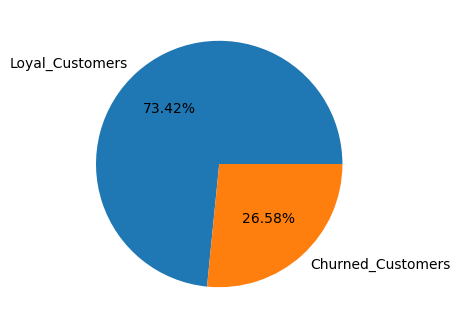

In [40]:
def Churn_Category (Churn) : 
    if Churn == 'Yes':
        return "Churned_Customers"
    else:
        return "Loyal_Customers"
    
df["Churn_Category"]=df["Churn"].apply(Churn_Category)
print(df["Churn_Category"].value_counts())

fig, ax = plt.subplots(figsize=(4,4))
count = Counter(df["Churn_Category"])

                
ax.pie(count.values(),labels=count.keys(),autopct=lambda p: f"{p:.2f}%")
plt.show();

### As of  at the time of this analysis, 26.58% the Connecttel customers have churned while 73.42% are remaining 

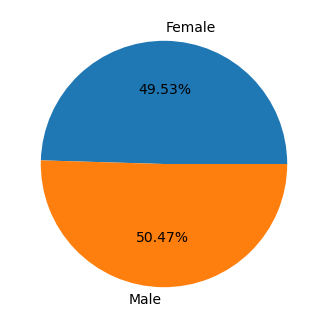

In [41]:
#univariate plot of the Gender feature (Pie plot)

fig, ax = plt.subplots(figsize=(4,4))
count = Counter(df["gender"])

                
ax.pie(count.values(),labels=count.keys(),autopct=lambda p: f"{p:.2f}%")
plt.show();

# OBSERVATION:
### The customer's distribution across the gender line is almost equal with the Male gender leading by only 67. 

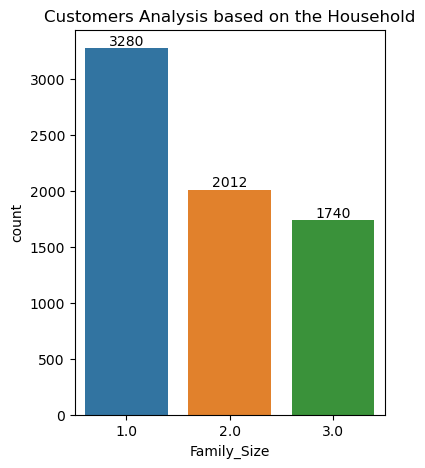

In [42]:
# Univariate Analysis of the Family_Size feature

plt.figure(figsize=(4,5))
ax =sns.countplot(x= df["Family_Size"], order = df["Family_Size"].value_counts(ascending=False).index)
values = df["Family_Size"].value_counts(ascending=False).values
ax.bar_label(container = ax.containers[0],labels = values)
plt.title("Customers Analysis based on the Household");

### Observation:  The customers that are singles (labelled as "1.0") are more (3,280),  partners (labelled as "2.0") with no child (2,014) are  more than those with a dependant, (labelled as "3.0") which has 1,749.
### Overall, lone customers are fewer than those with partners and dependents combined

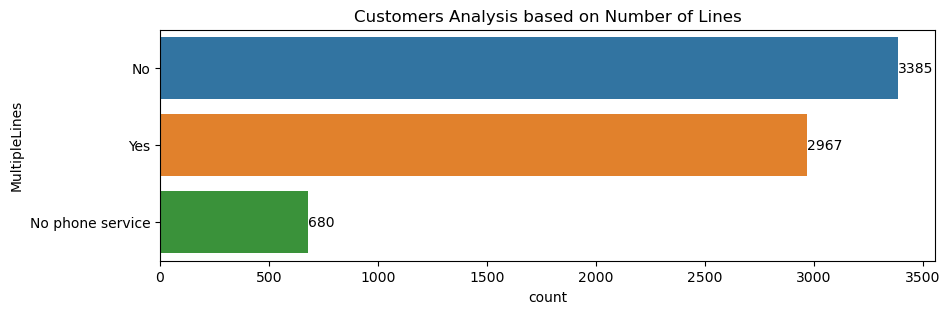

In [43]:
# Customers Analysis based on Number of Lines

plt.figure(figsize=(10,3))
ax =sns.countplot(y= df["MultipleLines"], order = df["MultipleLines"].value_counts(ascending=False).index)
values = df["MultipleLines"].value_counts(ascending=False).values
ax.bar_label(container = ax.containers[0],labels = values)
plt.title("Customers Analysis based on Number of Lines");

### Customers with a single line are in the majority (3390), followed by those with multiple lines
### while the customers with no line at all are in the distance minority of (680) 

Not a Senior Citizen    5890
Senior Citizen          1142
Name: Age_Category, dtype: int64


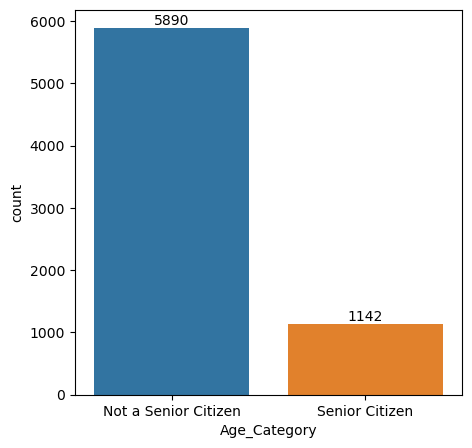

In [44]:
# Univariate Analysis of the SeniorCitizen feature

def Age_Category (SeniorCitizen) : 
    if SeniorCitizen == 1:
        return "Senior Citizen"
    else:
        return "Not a Senior Citizen"
    
df["Age_Category"]=df["SeniorCitizen"].apply(Age_Category)
print(df["Age_Category"].value_counts())
    
    
plt.figure(figsize=(5,5))
ax =sns.countplot(x= df['Age_Category'], order = df['Age_Category'].value_counts(ascending=False).index)
values = df['Age_Category'].value_counts(ascending=False).values
ax.bar_label(container = ax.containers[0],labels = values);

In [45]:
5901/(5901+1142)

0.8378531875621185

# OBSERVATION: 
### There are far less customers who are senior citizens than are not. About 84% of the customer base are not Seniors.

Text(0.5, 1.0, 'Customer analysis based on payment method')

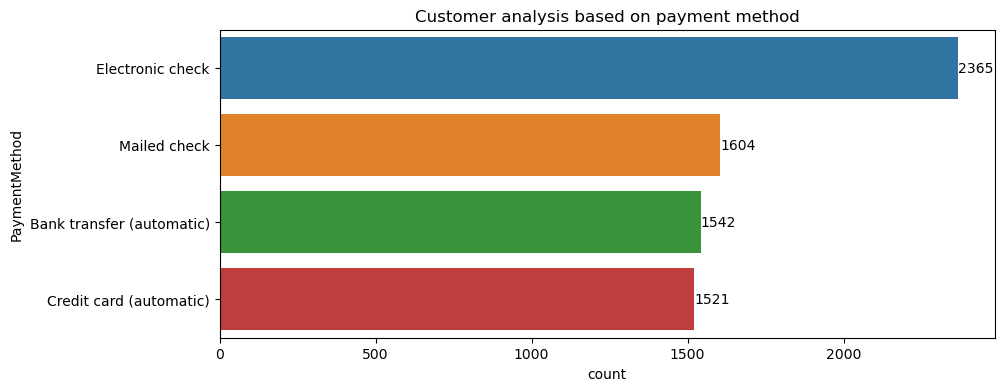

In [46]:
# Univariate Analysis of the PaymentMethod feature

plt.figure(figsize=(10,4))
ax =sns.countplot(y= df['PaymentMethod'], order = df['PaymentMethod'].value_counts(ascending=False).index)
values = df['PaymentMethod'].value_counts(ascending=False).values
ax.bar_label(container = ax.containers[0],labels = values);
plt.title("Customer analysis based on payment method")

### Observation: Electroncic check is clearly the most used method of payment while "Mailed check", "Bank transfer" and "credit card" follow respectively but are closely distributed. 

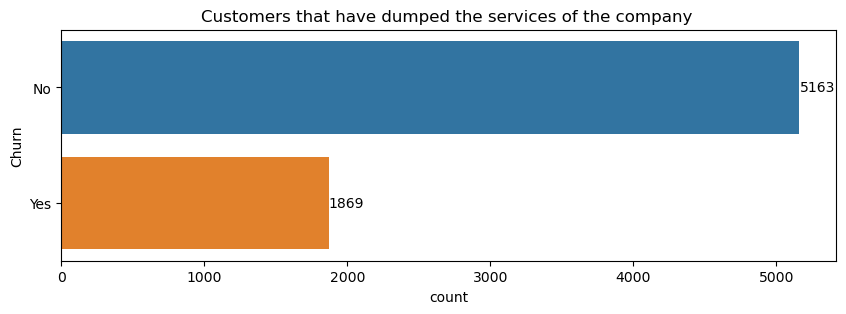

In [47]:
# Univariate Analysis of the Churn feature

plt.figure(figsize=(10,3))
ax =sns.countplot(y= df['Churn'], order = df['Churn'].value_counts(ascending=False).index)
values = df['Churn'].value_counts(ascending=False).values
ax.bar_label(container = ax.containers[0],labels = values)
plt.title("Customers that have dumped the services of the company ");

# OBSERVATION: 
### As at the time this dataset was collected, 1,869 customers has left the CONNECTTEL while 5,174 customers are  still with them

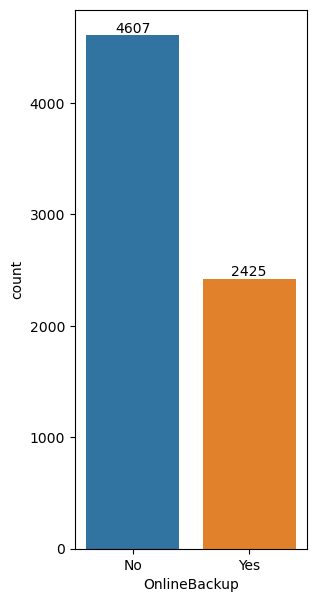

In [48]:
# Univariate Analysis of the OnlineBackup feature

plt.figure(figsize=(3,7))
ax =sns.countplot(x= df["OnlineBackup"], order = df["OnlineBackup"].value_counts(ascending=False).index)
values = df["OnlineBackup"].value_counts(ascending=False).values
ax.bar_label(container = ax.containers[0],labels = values);

 # OBSERVATION:
 ### 4614 don't have onlineBackup, while 2,429 have onlineBackup

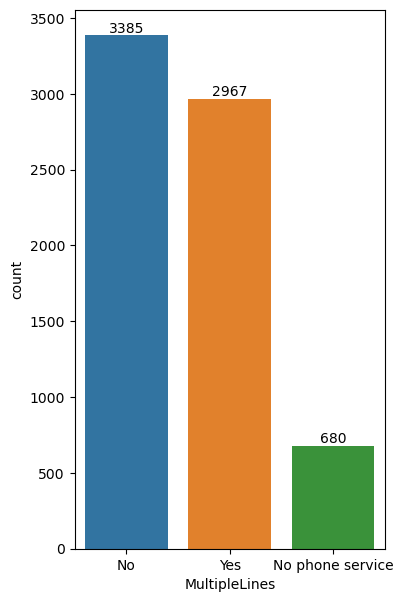

In [49]:
# Univariate Analysis of the MultipleLines feature

plt.figure(figsize=(4,7))
ax =sns.countplot(x= df["MultipleLines"], order = df["MultipleLines"].value_counts(ascending=False).index)
values = df["MultipleLines"].value_counts(ascending=False).values
ax.bar_label(container = ax.containers[0],labels = values);

### A total of 6,3661 customers has phone service (either single line or multiple) while 680 subscribers has

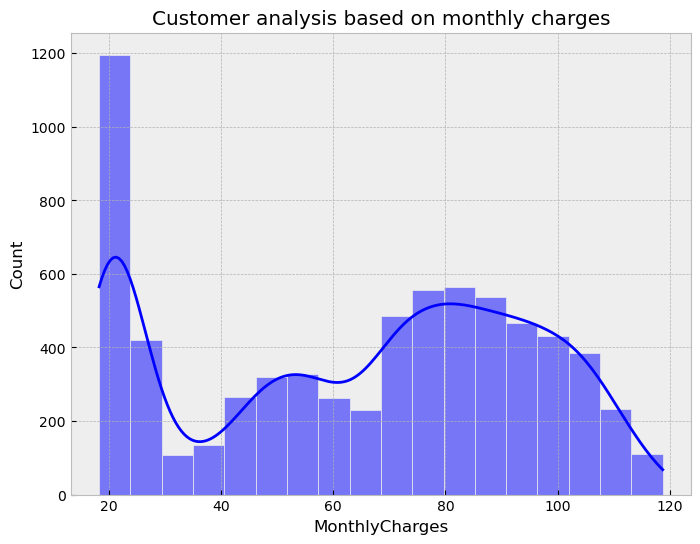

In [50]:
#univariate distribution of the MonthlyCharges

plt.style.use('bmh')
plt.figure(figsize=(8,6))
sns.histplot(df["MonthlyCharges"],kde=True)
plt.title("Customer analysis based on monthly charges");

# OBSERVATION:
### Customers with monthlty payment of about USD 20 are in the overwhelming majority

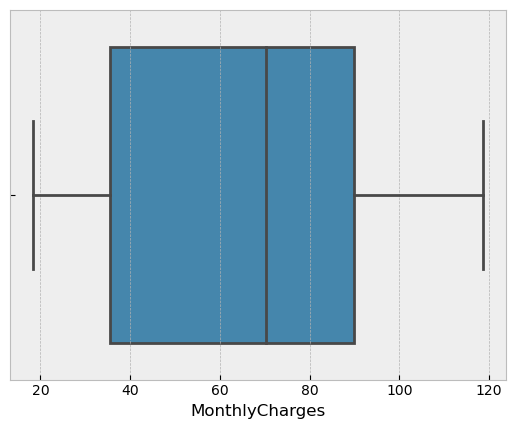

In [51]:
# Another look at Customers vs Monthly Charges
sns.boxplot(x =df["MonthlyCharges"]);

# OBSERVATION:
### There are no outliers in the monthly charges

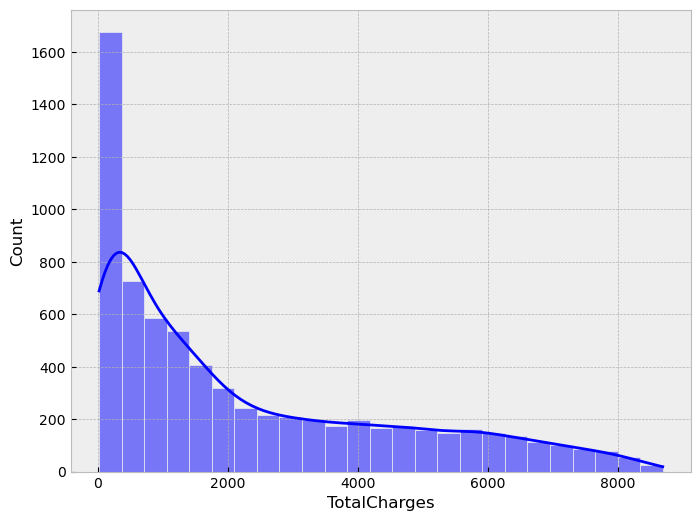

In [52]:
#univariate distribution of the TotalCharges

plt.style.use('bmh')
plt.figure(figsize=(8,6))
sns.histplot(df["TotalCharges"],kde=True);

## OBSERVATIONS: 
### 1. There are no outliers in both the Monthly charges and the Total charges 
### 2. The fitting curve looks like a pareto probability density function (Pdf). customers with the lowest 
### totalCharges are in the    overwhelming majority. The higher the TotalCharges, the less cusstomers subscription and vice versa

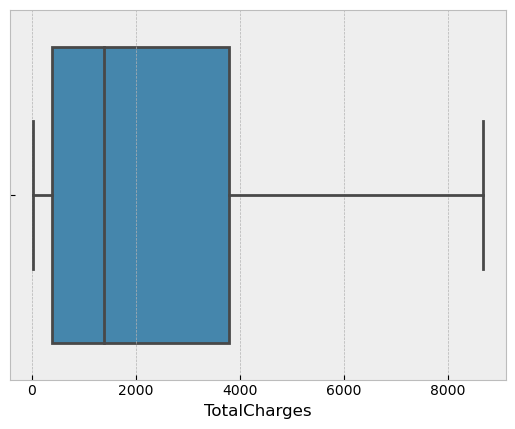

In [53]:
sns.boxplot(x =df["TotalCharges"]);

# OBSERVATION:
### Again, no outliers in the TotalCharges colomn

## BIVARIATE ANALYSIS

Text(0.5, 1.0, 'Gender based Churn Analysis of customers')

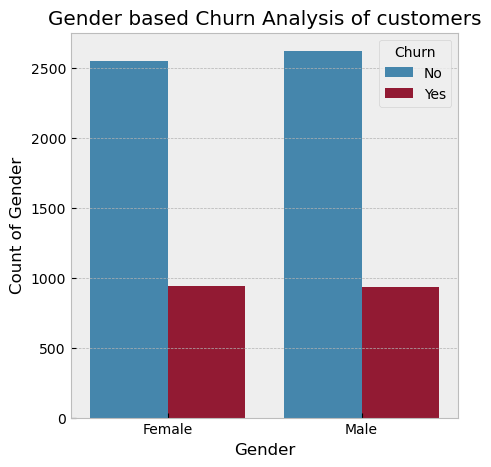

In [54]:
plt.figure(figsize=(5,5))
sns.countplot(x= "gender", data =df, hue = "Churn")
plt.xlabel("Gender")
plt.ylabel("Count of Gender")
plt.title("Gender based Churn Analysis of customers")



## OBSERVATIONs;
### Again the Number of customer that have left the company and those that are still with them are  almost equally distributed along  the gender divide

single                           3280
Partners                         2012
Parents with at least a child    1740
Name: HouseHold, dtype: int64


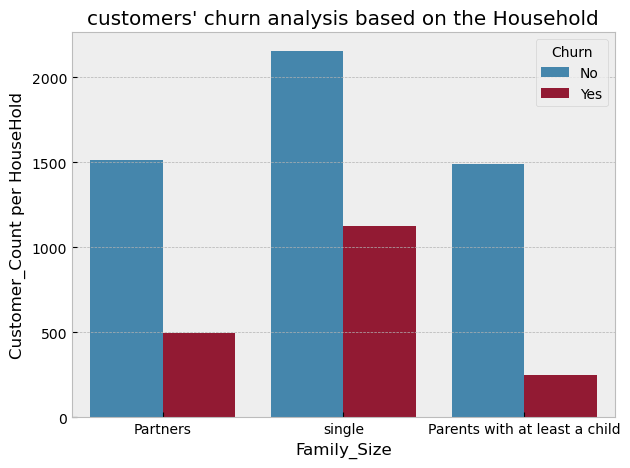

In [55]:
def HouseHold(Family_Size): 
    if Family_Size == 1:
        return "single"
    elif Family_Size == 2:
        return "Partners"
    else:
        return "Parents with at least a child"
    
df["HouseHold"]=df["Family_Size"].apply(HouseHold)
print(df["HouseHold"].value_counts())

plt.figure(figsize=(7,5))
sns.countplot(x= "HouseHold", data =df, hue = "Churn")
plt.xlabel("Family_Size")
plt.ylabel("Customer_Count per HouseHold")
plt.title("customers' churn analysis based on the Household");

# OBSERVATIIONS:
### 1.Only about one-quater of customers with partners have left the company;
### 2. just about one-sevenxth of the customers that are parents with at least a child has left.
### 3. 2. More than one-third of single customers have left the company;
### It suggest that larger household are more likely to stay with the company

Not a Senior Citizen    5890
Senior Citizen          1142
Name: Age_Category, dtype: int64


Text(0.5, 1.0, 'SeniorCitizen Vs Churn')

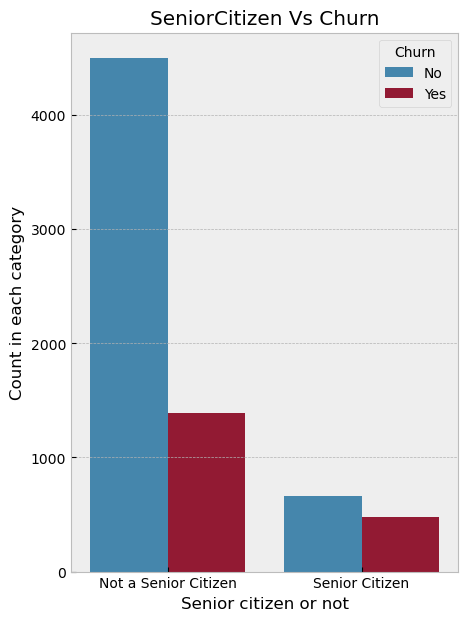

In [56]:
# SeniorCitizen Vs Churn

print(df["Age_Category"].value_counts())

plt.figure(figsize=(5,7))
sns.countplot(x= "Age_Category", data =df, hue = "Churn")
plt.xlabel("Senior citizen or not")
plt.ylabel("Count in each category")
plt.title("SeniorCitizen Vs Churn")

## Observation:
### More than two-fifth of the Senior Citizens have stopped doing business with  the company, whereas, less than one-quater of the customers that are younger have left the organization.

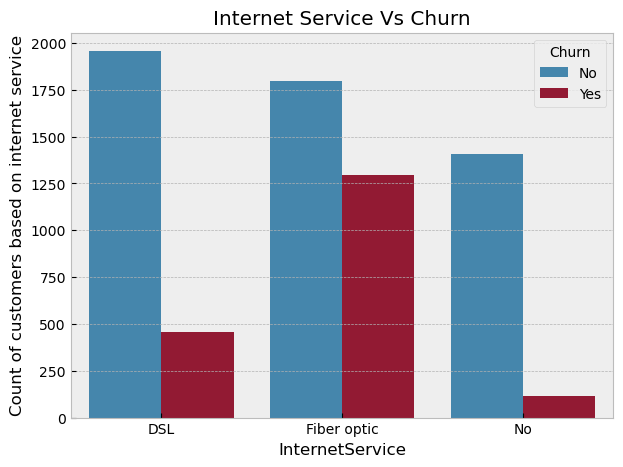

In [57]:
#Internet Service Vs Churn
plt.figure(figsize=(7,5))
sns.countplot(x= "InternetService", data =df, hue = "Churn")
plt.xlabel("InternetService")
plt.ylabel("Count of customers based on internet service")
plt.title("Internet Service Vs Churn");

# OBSERVATION:
### Customers with Fiber optic based internet service are the group of customers that have dumped the company the most. Infact, about 5/12 of them have left. The company might want to do something to upscale it quality of fiber optic service urgently.  


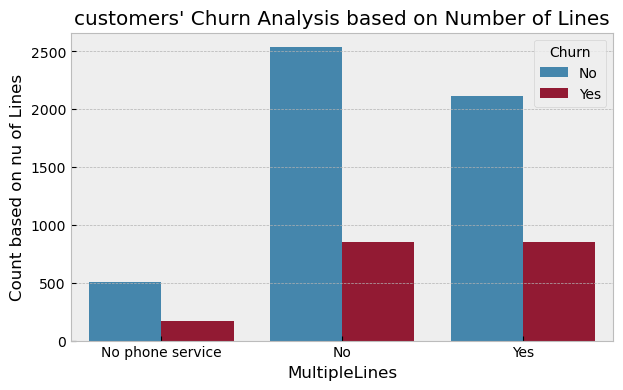

In [58]:
plt.figure(figsize=(7,4))
sns.countplot(x= "MultipleLines", data =df, hue = "Churn")
plt.xlabel("MultipleLines")
plt.ylabel("Count based on nu of Lines")
plt.title("customers' Churn Analysis based on Number of Lines");

# OBSERVATION: 
### Those with no phone service are the smallest in count and about one-quater have left the company;less than one-quater of the customers with single line have left. Less than one-third of the customers that have multiple lines have left. The proportion of those customers that have left, having multiple lines are more  


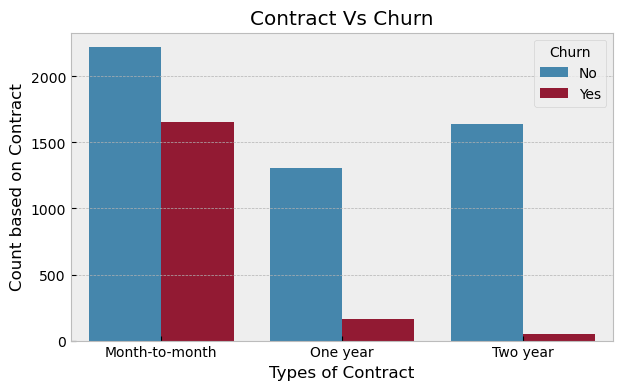

In [59]:
#bivariate Churn Vs Contract


plt.figure(figsize=(7,4))
sns.countplot(x= "Contract", data =df, hue = "Churn")
plt.xlabel("Types of Contract")
plt.ylabel("Count based on Contract")
plt.title("Contract Vs Churn");


# OBSERVATION:
### Types of contract is a major predictor of Churn. Customers with short contract of one month are the most that dump the company, followed by one year and the least is two year contract holders.

In [60]:
df.columns

Index(['gender', 'SeniorCitizen', 'tenure', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'Streaming', 'Family_Size', 'Churn_Category',
       'Age_Category', 'HouseHold'],
      dtype='object')

Text(0.5, 1.0, 'PaperlessBilling Vs Churn')

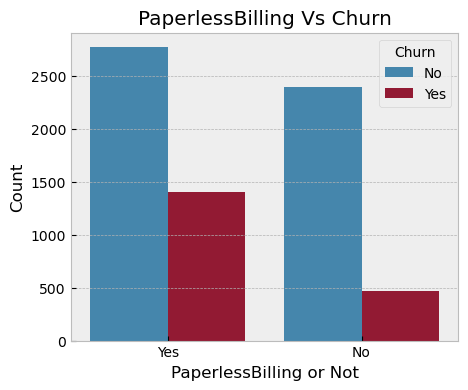

In [61]:
# PaperlessBilling Vs Churn 


plt.figure(figsize=(5,4))
sns.countplot(x= "PaperlessBilling", data =df, hue = "Churn")
plt.xlabel("PaperlessBilling or Not")
plt.ylabel("Count")
plt.title("PaperlessBilling Vs Churn")

# OBSERVATIONs:
### 1. More customers with paperlessBilling have dumped the company, Infact, about one-third of PaperlessBilling customers have left doing business with the company. 
### 2. The number of customers that have PaperlesBilling that have exited is roughly three times higher than those exited customers that are not PaperlessBillings.
### 3. Whereas, only about one-sixth of the No PaperlessBilling customers have left which is also roughlyonly one-quater of the total customers that have exited within the period under review 

Text(0.5, 1.0, 'PaymentMethod Vs Churn')

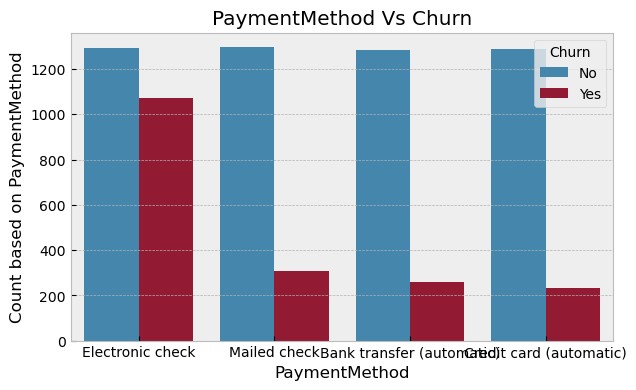

In [62]:
# PaymentMethod Vs Churn 


plt.figure(figsize=(7,4))
sns.countplot(x= "PaymentMethod", data =df, hue = "Churn")
plt.xlabel("PaymentMethod")
plt.ylabel("Count based on PaymentMethod")
plt.title("PaymentMethod Vs Churn")


# OBSERVATION: 
### Customers that use Electronic check payment method are clearly the ones that have highest customers in total, and a disproportionately higher customers that have left. Close to half of this group of customer has stopped patronizing the company. The company might want to zoom in and investigate this unhealthy exodus pecuiar to this group of customers with a view to remedying the negative trend 

Text(0.5, 1.0, 'Streaming Vs Churn')

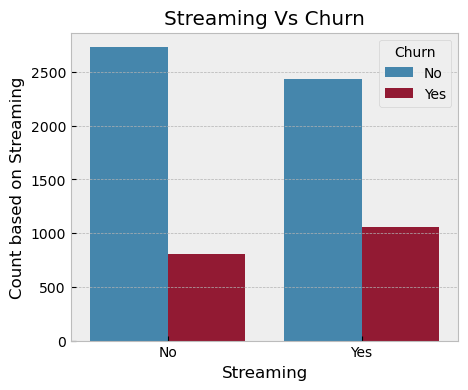

In [64]:
# Streaming Vs Churn
plt.figure(figsize=(5,4))
sns.countplot(x= "Streaming", data =df, hue = "Churn")
plt.xlabel("Streaming")
plt.ylabel("Count based on Streaming")
plt.title("Streaming Vs Churn")


# OBSERVATIONS: 
### In proportion of total customers in each cagtegory, more of streaming customers have left compared to customers that don't stream. The company might need to do something to upgrade the quality of their internet service

### Multivariate Analysis

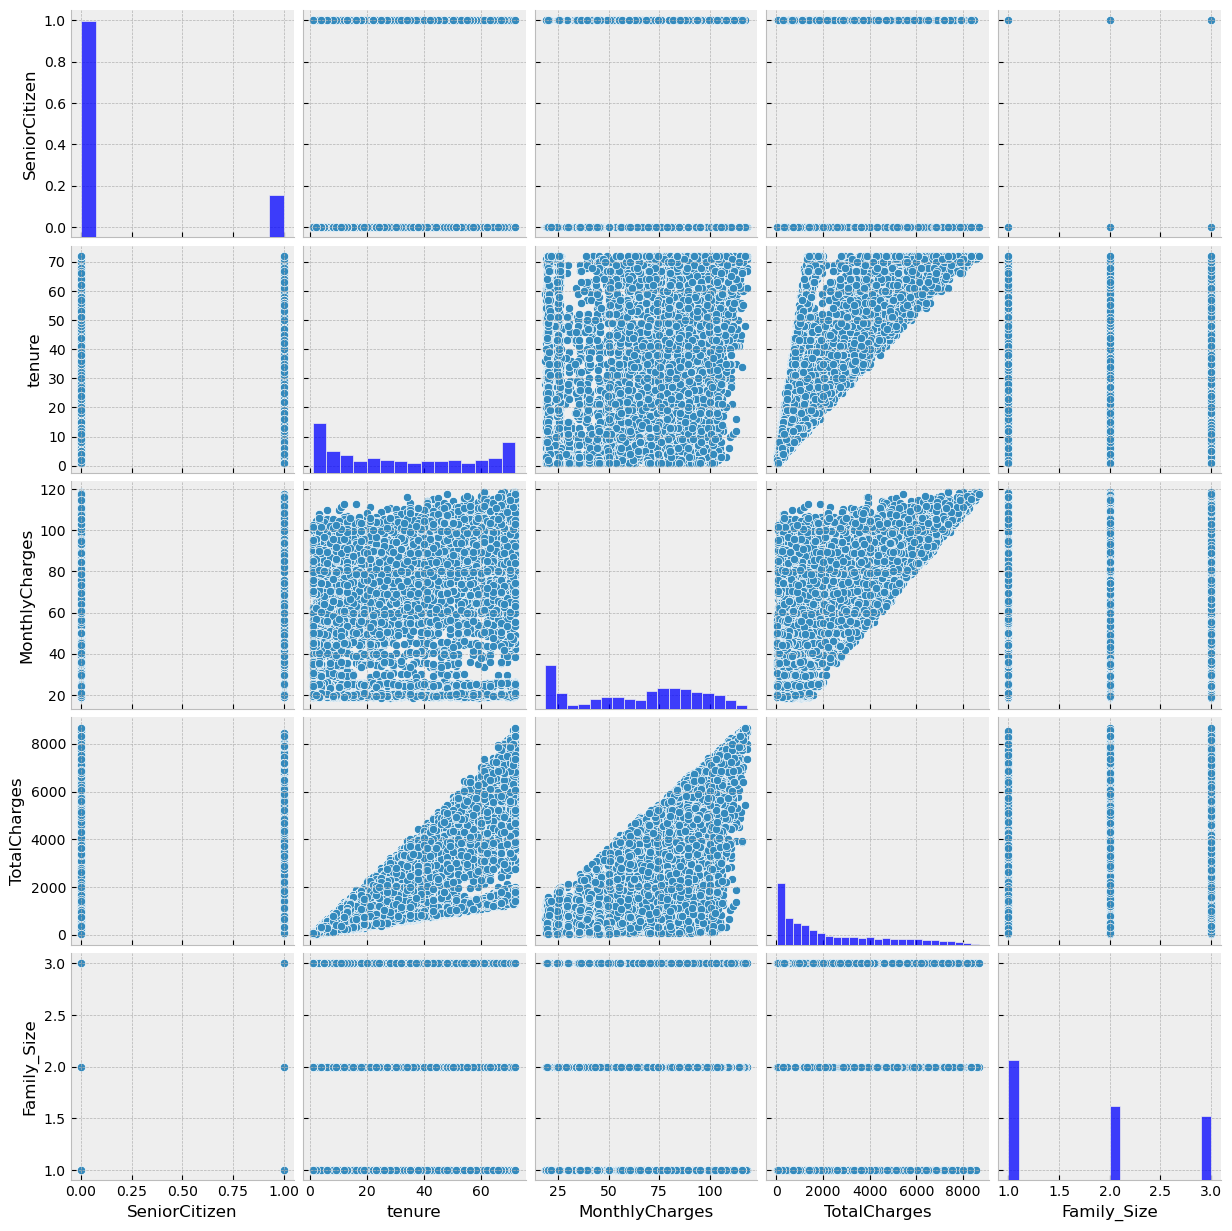

In [65]:
# multivariate exploring the distribtions and interactions between the variables 
sns.pairplot(df);

# OBSERVATIONS:
### 1. As expected, TotalCharge is directly proportional to MonthlyCharge and tenure 


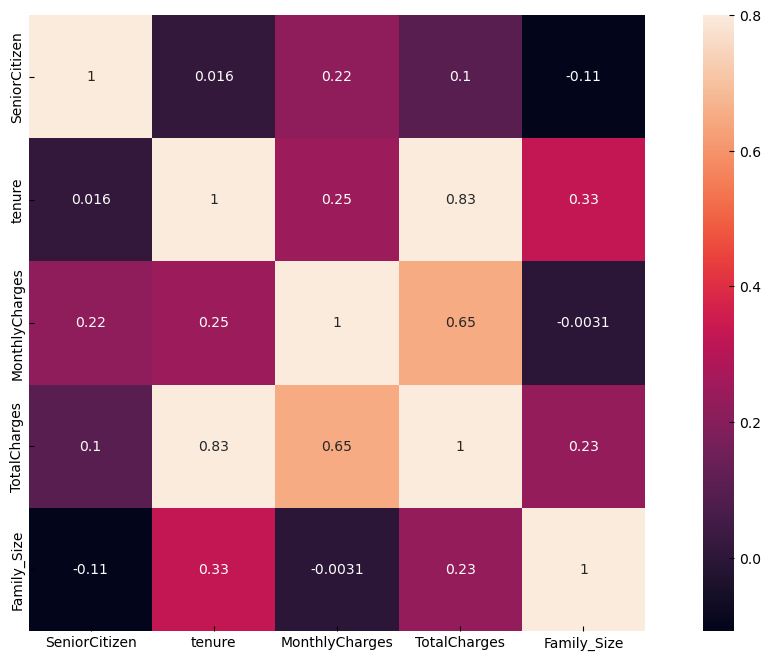

In [66]:
a = df.corr()
f, ax = plt.subplots(figsize =(15,8))
sns.heatmap(a, vmax =.8, square = True, annot=True);

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   tenure            7032 non-null   int64  
 3   MultipleLines     7032 non-null   object 
 4   InternetService   7032 non-null   object 
 5   OnlineSecurity    7032 non-null   object 
 6   OnlineBackup      7032 non-null   object 
 7   DeviceProtection  7032 non-null   object 
 8   TechSupport       7032 non-null   object 
 9   Contract          7032 non-null   object 
 10  PaperlessBilling  7032 non-null   object 
 11  PaymentMethod     7032 non-null   object 
 12  MonthlyCharges    7032 non-null   float64
 13  TotalCharges      7032 non-null   float64
 14  Churn             7032 non-null   object 
 15  Streaming         7032 non-null   object 
 16  Family_Size       7032 non-null   float64


## Standardization And Encoding

In [68]:
df2 =df.copy()

In [69]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   tenure            7032 non-null   int64  
 3   MultipleLines     7032 non-null   object 
 4   InternetService   7032 non-null   object 
 5   OnlineSecurity    7032 non-null   object 
 6   OnlineBackup      7032 non-null   object 
 7   DeviceProtection  7032 non-null   object 
 8   TechSupport       7032 non-null   object 
 9   Contract          7032 non-null   object 
 10  PaperlessBilling  7032 non-null   object 
 11  PaymentMethod     7032 non-null   object 
 12  MonthlyCharges    7032 non-null   float64
 13  TotalCharges      7032 non-null   float64
 14  Churn             7032 non-null   object 
 15  Streaming         7032 non-null   object 
 16  Family_Size       7032 non-null   float64


### We shall be dropping HouseHold and Age_grouping that we created for visualization purpose

In [70]:
df2 = df2.drop(["HouseHold","Age_Category"], axis=1)

In [71]:
#importing from sklearn lib
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder

s = (df2.dtypes == "object")
cat_var = list(s[s].index)


#encode cat_var
encoder = LabelEncoder()
for i in cat_var:
    df2[i] = df2[[i]].apply(encoder.fit_transform)


In [72]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int32  
 1   SeniorCitizen     7032 non-null   int64  
 2   tenure            7032 non-null   int64  
 3   MultipleLines     7032 non-null   int32  
 4   InternetService   7032 non-null   int32  
 5   OnlineSecurity    7032 non-null   int32  
 6   OnlineBackup      7032 non-null   int32  
 7   DeviceProtection  7032 non-null   int32  
 8   TechSupport       7032 non-null   int32  
 9   Contract          7032 non-null   int32  
 10  PaperlessBilling  7032 non-null   int32  
 11  PaymentMethod     7032 non-null   int32  
 12  MonthlyCharges    7032 non-null   float64
 13  TotalCharges      7032 non-null   float64
 14  Churn             7032 non-null   int32  
 15  Streaming         7032 non-null   int32  
 16  Family_Size       7032 non-null   float64


In [73]:
df2.head()

,gender,SeniorCitizen,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Streaming,Family_Size,Churn_Category
0,0,0,1,1,0,0,1,0,0,0,1,2,29.85,29.85,0,0,2.0,1
1,1,0,34,0,0,1,0,1,0,1,0,3,56.95,1889.50,0,0,1.0,1
2,1,0,2,0,0,1,1,0,0,0,1,3,53.85,108.15,1,0,1.0,0
3,1,0,45,1,0,1,0,1,1,1,0,0,42.30,1840.75,0,0,1.0,1
4,0,0,2,0,1,0,0,0,0,0,1,2,70.70,151.65,1,0,1.0,0


### All the categorical features are now converted (Encoded) to numbers which is the format that ML algorithms can work with. 

In [74]:
#This is for the purpose of getting our target label to the etreme RHS of the grid for easy visualization
df2["labe"]=df2["Churn"]

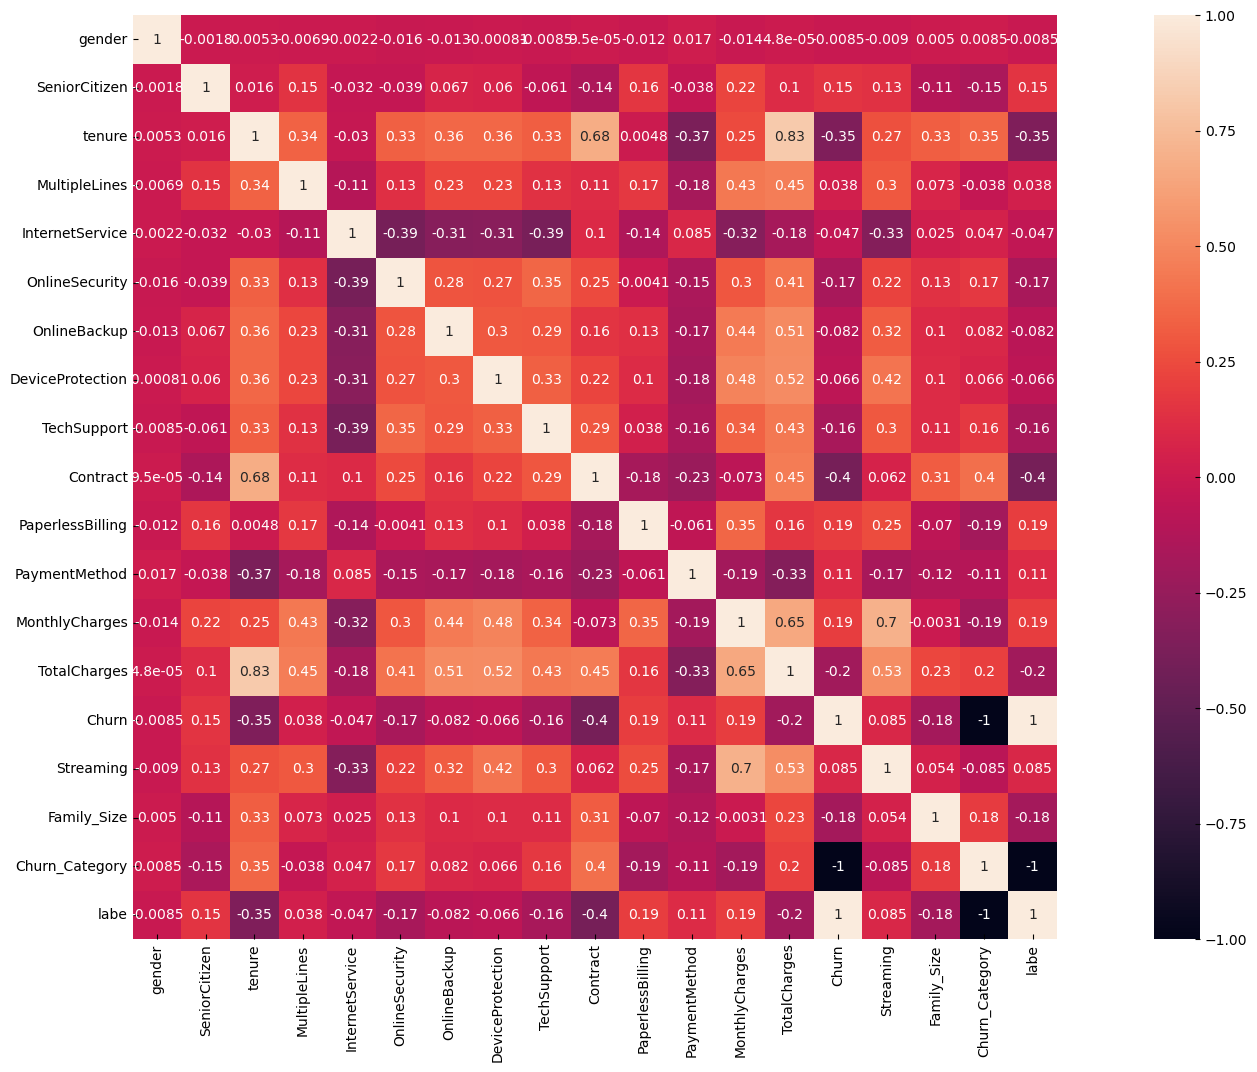

In [75]:
a = df2.corr()
f, ax = plt.subplots(figsize =(25,12))
sns.heatmap(a, vmax =1, square = True, annot=True);

# OBSERVATIONS:
### Contrat and tenure have respectively -0.4 and -0,35 correlation with the Target_Feature which are the highest in the negative direction. Whereas, MonthlyCharges and PaperlessBilling both have a correlation coefficient of 0.19 which are weak +ve correlation

### Now, it's time to separate the target data from the rest of the dataset

In [76]:
DF = df2[['SeniorCitizen','tenure','OnlineSecurity','TechSupport','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges','Family_Size']]

In [77]:
#The target feature
target=df2["Churn"]

### Time to scale our dataset (DF) using MinMaxScaler

In [78]:
#scale dataset
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
#scaler = MinMaxScaler()

scaled_DF = pd.DataFrame(scaler.fit_transform(DF),columns=DF.columns)

In [79]:
scaled_DF.head()

,SeniorCitizen,tenure,OnlineSecurity,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Family_Size
0,-0.440327,-1.280248,-0.633746,-0.639260,-0.826735,0.828939,0.399805,-1.161694,-0.994194,0.268368
1,-0.440327,0.064303,1.577918,-0.639260,0.373926,-1.206361,1.336636,-0.260878,-0.173740,-0.957064
2,-0.440327,-1.239504,1.577918,-0.639260,-0.826735,0.828939,1.336636,-0.363923,-0.959649,-0.957064
3,-0.440327,0.512486,1.577918,1.564308,0.373926,-1.206361,-1.473857,-0.747850,-0.195248,-0.957064
4,-0.440327,-1.239504,-0.633746,-0.639260,-0.826735,0.828939,0.399805,0.196178,-0.940457,-0.957064


In [80]:
df3=scaled_DF.copy()

# Machine Learning

In [81]:
#Classifier Libraries
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#!pip install xgboost
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#Library for Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix


In [82]:
# Splitting the dataset into training and testing data
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train,X_test,y_train,y_test= train_test_split(df3, target, test_size = 0.2, random_state=42)

In [83]:
X_train.head()

,SeniorCitizen,tenure,OnlineSecurity,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Family_Size
6021,-0.440327,0.430998,-0.633746,-0.639260,-0.826735,0.828939,-1.473857,-0.523477,-0.091370,-0.957064
3404,-0.440327,-1.198760,-0.633746,-0.639260,-0.826735,-1.206361,-0.537026,-0.378881,-0.924111,-0.957064
5474,-0.440327,0.919926,-0.633746,-0.639260,-0.826735,0.828939,0.399805,0.430523,0.959516,0.268368
5515,-0.440327,0.512486,1.577918,1.564308,1.574587,-1.206361,-1.473857,-0.337331,0.119297,1.493801
6328,-0.440327,0.919926,1.577918,-0.639260,0.373926,-1.206361,1.336636,1.200040,1.396490,1.493801


In [84]:
X_train.shape

(5625, 10)

In [85]:
X_test.shape

(1407, 10)

In [86]:
y_test.shape

(1407,)

In [87]:
y_train.shape

(5625,)

In [88]:
#Model building

#1. logistic Regression

# Splitting the dataset into training and testing data
# X_test,X_train,y_test,y_train= train_test_split(df3, target, test_size = 0.8, random_state=42)

My_logreg= LogisticRegression()
My_logreg.fit(X_train, y_train)
pred_y = My_logreg.predict(X_test)

# Calculate accuracy and other metrics
print("Logistic Regression Metrics")
print("Accuracy:", accuracy_score(y_test,pred_y))
print("Precision:",precision_score(y_test,pred_y))
print("Recall:", recall_score(y_test,pred_y))
print("F1-Score:", f1_score(y_test,pred_y))
print("ROC-AUC:", roc_auc_score(y_test,pred_y))

Logistic Regression Metrics
Accuracy: 0.7874911158493249
Precision: 0.6254180602006689
Recall: 0.5
F1-Score: 0.5557206537890045
ROC-AUC: 0.6957889641819943


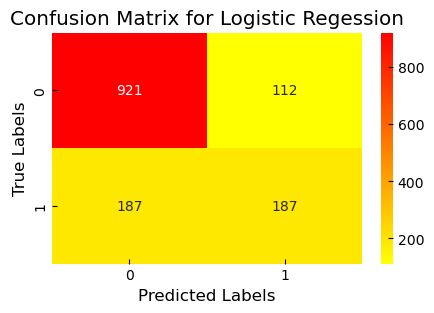

In [89]:
# Compute the confusion matrix for Logistic regression
cm_log_reg = confusion_matrix(y_test, pred_y)

# Visualize the confusion matrix
plt.figure(figsize=(5, 3))
sns.heatmap(cm_log_reg, annot=True, cmap='autumn_r', fmt='g')
plt.title('Confusion Matrix for Logistic Regession')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [90]:
#Random Forest Model
My_RFC= RandomForestClassifier()
My_RFC.fit(X_train, y_train)
pred_rfcy = My_RFC.predict(X_test)

# Calculate accuracy and other metrics
print("Random Forest Classifier Metrics")
print("Accuracy:", accuracy_score(y_test,pred_rfcy))
print("Precision:",precision_score(y_test,pred_rfcy))
print("Recall:", recall_score(y_test,pred_rfcy))
print("F1-Score:", f1_score(y_test,pred_rfcy))
print("ROC-AUC:", roc_auc_score(y_test,pred_rfcy))

Random Forest Classifier Metrics
Accuracy: 0.7874911158493249
Precision: 0.629757785467128
Recall: 0.48663101604278075
F1-Score: 0.5490196078431372
ROC-AUC: 0.6915246077309741


In [91]:
# Create the Support vector Classifier (SVM)
svm_classifier = SVC()

# Fit the classifier to the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_svm = svm_classifier.predict(X_test)

# Calculate accuracy and other metrics
print("Support Vector Classifier Metrics")
print("Accuracy:", accuracy_score(y_test,y_pred_svm))
print("Precision:",precision_score(y_test,y_pred_svm))
print("Recall:", recall_score(y_test,y_pred_svm))
print("F1-Score:", f1_score(y_test,y_pred_svm))
print("ROC-AUC:", roc_auc_score(y_test,y_pred_svm))

Support Vector Classifier Metrics
Accuracy: 0.7825159914712153
Precision: 0.636
Recall: 0.42513368983957217
F1-Score: 0.5096153846153846
ROC-AUC: 0.6685203783176563


In [92]:
#!pip install xgboost

In [93]:
import xgboost as xgb
# Create the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Fit the classifier to the training data
xgb_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_xgb = xgb_classifier.predict(X_test)


# Calculate accuracy and other metrics
print("XGBOOST Classifier Metrics")
print("Accuracy:", accuracy_score(y_test,y_pred_xgb))
print("Precision:",precision_score(y_test,y_pred_xgb))
print("Recall:", recall_score(y_test,y_pred_xgb))
print("F1-Score:", f1_score(y_test,y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test,y_pred_xgb))

XGBOOST Classifier Metrics
Accuracy: 0.7796730632551528
Precision: 0.6025641025641025
Recall: 0.5026737967914439
F1-Score: 0.5481049562682216
ROC-AUC: 0.6913175373115011


### EXperimenting with ensembles to see if we can have higher performance 

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris


rf_classifier = RandomForestClassifier()
gb_classifier = GradientBoostingClassifier()

# Create the ensemble model with the individual classifiers
ensemble_model = VotingClassifier(estimators=[('rf', rf_classifier), ('gb', gb_classifier)], voting='hard')

# Fit the ensemble model to the training data
ensemble_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_ens = ensemble_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_ens)
print("Accuracy:", accuracy)
print("Precision:",precision_score(y_test,y_pred_ens))
print("Recall:", recall_score(y_test,y_pred_ens))
print("F1-Score:", f1_score(y_test,y_pred_ens))
print("ROC-AUC:", roc_auc_score(y_test,y_pred_ens))


Accuracy: 0.7953091684434968
Precision: 0.6919642857142857
Recall: 0.4144385026737968
F1-Score: 0.5183946488294314
ROC-AUC: 0.6738213810561627


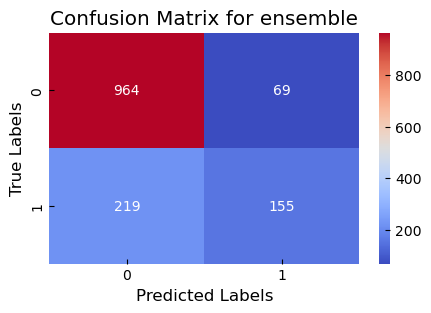

In [95]:
# Compute the confusion matrix for SVM 
cm_ens = confusion_matrix(y_test, y_pred_ens)

# Visualize the confusion matrix
plt.figure(figsize=(5, 3))
sns.heatmap(cm_ens, annot=True, cmap='coolwarm', fmt='g')
plt.title('Confusion Matrix for ensemble')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Definitions, 
### Customers that didn't churn ,labelled as "0"= Negative;
### Customers that churned ,labelled as "1"= Positive;
### True Positive =151; (correctly predicted as churned)
### True Negative = 964; (correctly predicted as non-churn)
### False Positive= 69;  (Wrongly predicted as churned)
### False Negative = 223. (wrongly predicted as non-churn)

# Model selection criteria:

### Since our target data is an imbalance data (the two unique classifications of "churned" and yet to "churn" customers are not equally distributed, loyal customers are in the overwhelming majority), using accuracy or precision as our metrics that determine the performance and hence the choice our model would be misleading.

### The more appropriate metrics to consider in this case are F1_Score and ROC_AUC. They are often considered more appropriate metrics for evaluating models on imbalanced datasets because they take into account both the true positive rate (sensitivity) and the true negative rate (specificity), providing a more balanced view of model performance.

### going by the above: logistic regression model outperformed all other model that were tested in this ML project, including the ensemble.

### Hence, logistic regression model is the model of choice for this particular project.

### Optimizing the selected model with hyper parameter tuning

In [96]:
from sklearn.model_selection import GridSearchCV
#from sklearn.linear_model import LogisticRegression

# Define hyperparameters and parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Penalty type
    'solver': ['liblinear', 'saga']  # Solver algorithm
}

# Instantiate logistic regression model
logistic_reg = LogisticRegression()

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(logistic_reg, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get best hyperparameters and performance
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Fit logistic regression model with best hyperparameters
best_logistic_reg = LogisticRegression(**best_params)
best_logistic_reg.fit(X_train, y_train)


LogisticRegression(C=0.001, solver='liblinear')

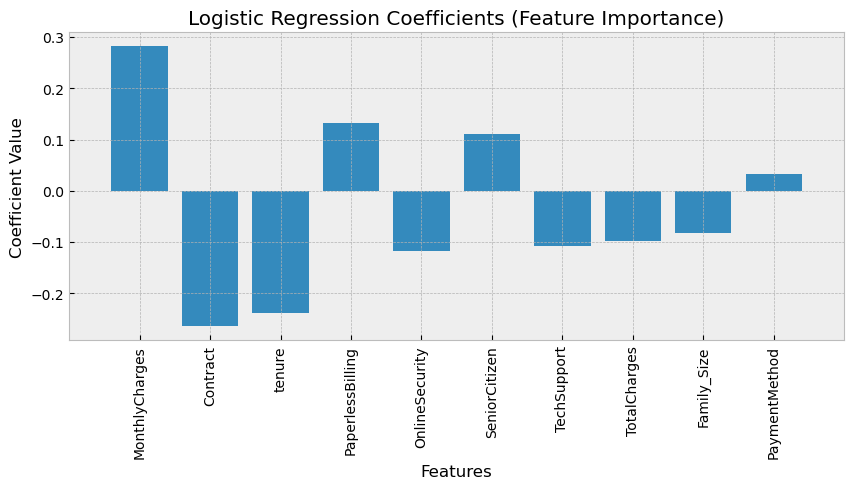

Logistic Regression Metrics_2
Accuracy: 0.7889125799573561
Precision: 0.617737003058104
Recall: 0.5401069518716578
F1-Score: 0.5763195435092725
ROC-AUC: 0.7095500877460903


In [97]:

# Fit logistic regression model with best hyperparameters
best_logistic_reg = LogisticRegression(C=0.001, solver='liblinear')
hyper = best_logistic_reg.fit(X_train, y_train)
hyper_lr_Pred_y=hyper.predict(X_test)

# Get feature importances
# import numpy as np
# import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
# from sklearn.linear_model import LogisticRegression


# Get feature coefficients
coefficients = best_logistic_reg.coef_[0]



# Get feature names
feature_names = df3.columns


# Sort feature coefficients by absolute value
indices = np.argsort(np.abs(coefficients))[::-1]

# Plot feature coefficients
plt.figure(figsize=(10, 4))
plt.bar(range(df3.shape[1]), coefficients[indices], align="center")
plt.xticks(range(df3.shape[1]), np.array(feature_names)[indices], rotation=90)
plt.xlim([-1, df3.shape[1]])
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.title("Logistic Regression Coefficients (Feature Importance)")
plt.show()



print("Logistic Regression Metrics_2")
print("Accuracy:", accuracy_score(y_test,hyper_lr_Pred_y))
print("Precision:",precision_score(y_test,hyper_lr_Pred_y))
print("Recall:", recall_score(y_test,hyper_lr_Pred_y))
print("F1-Score:", f1_score(y_test,hyper_lr_Pred_y))
print("ROC-AUC:", roc_auc_score(y_test,hyper_lr_Pred_y))

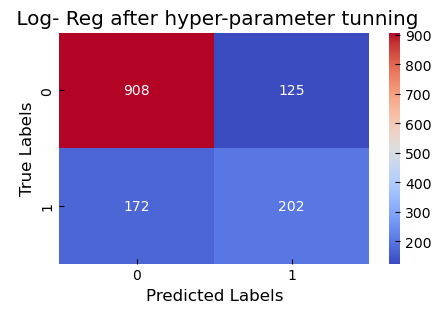

In [98]:
# Compute the confusion matrix for SVM 
cm_log_reg2 = confusion_matrix(y_test, hyper_lr_Pred_y)

# Visualize the confusion matrix
plt.figure(figsize=(5, 3))
sns.heatmap(cm_log_reg2, annot=True, cmap='coolwarm', fmt='g')
plt.title(' Log- Reg after hyper-parameter tunning')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#### After the hyper parameter tuning, there is a mrginal improvement in the
#### performance of our model in terms of F1_score and ROC-AUC.

### Before hyper-parameter tuning:
#### F1-Score: 0.5557206537890045
#### ROC-AUC: 0.6957889641819943

### After the hyper-parameter tuning:
#### F1-Score: 0.5763195435092725
#### ROC-AUC: 0.7095500877460903

#### F1-score = 55.57% ====>  57.63%
####  ROC-AUC: 69.58% ====> 70.96%

#### Comparing the confusion matices of the pre and the post hyper-parameter tuning,
#### the improvement due to hyper-parameter tunning is manifested in the increase in 
#### the number of True Positive from 187 (logistic regression) to 202 after the tuning of the Logistic Regression
#### identifying more of the customers that are likely to churn and proactively prevent them from churning is the main goal of this project.
#### We can also see a reduction in the false negative from 187 to 172. This is in line with our objective